<a href="https://colab.research.google.com/github/rajaganaa/Rajaganaa_ML_Project2/blob/main/ML_2_hospital_readmission_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Predicting Hospital Readmissions

In [ ]:
#The primary goal of this project is to build a predictive model that can identify patients
# who are at high risk of hospital readmission within 30 days after their initial discharge.

In [ ]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder, OrdinalEncoder

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
raw_df = pd.read_csv(r"/content/drive/Othercomputers/My Laptop (1)/Desktop/raj007_projects/RAJA_ML_PROJEC_2/synthetic_hospital_readmissions_data.csv")

In [ ]:
raw_df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,0,2,0,35,14,2,1,4,5,1,0
1,2,32,2,1,2,66,3,1,2,4,6,1,0
2,3,78,0,0,0,22,2,4,3,3,5,0,1
3,4,38,0,2,2,22,10,2,2,3,9,1,1
4,5,41,1,1,1,3,6,4,3,1,2,0,0


In [ ]:
raw_df.shape

(10000, 13)

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   Patient_ID             10000 non-null  int64 
 1   Age                    10000 non-null  int64 
 2   Gender                 10000 non-null  object
 3   Admission_Type         10000 non-null  object
 4   Diagnosis              10000 non-null  object
 5   Num_Lab_Procedures     10000 non-null  int64 
 6   Num_Medications        10000 non-null  int64 
 7   Num_Outpatient_Visits  10000 non-null  int64 
 8   Num_Inpatient_Visits   10000 non-null  int64 
 9   Num_Emergency_Visits   10000 non-null  int64 
 10  Num_Diagnoses          10000 non-null  int64 
 11  A1C_Result             5966 non-null   object
 12  Readmitted             10000 non-null  object
dtypes: int64(8), object(5)
memory usage: 1015.8+ KB


In [ ]:
raw_df.isnull().sum()

Patient_ID                  0
Age                         0
Gender                      0
Admission_Type              0
Diagnosis                   0
Num_Lab_Procedures          0
Num_Medications             0
Num_Outpatient_Visits       0
Num_Inpatient_Visits        0
Num_Emergency_Visits        0
Num_Diagnoses               0
A1C_Result               4034
Readmitted                  0
dtype: int64

In [ ]:
raw_df.nunique()

Patient_ID               10000
Age                         68
Gender                       3
Admission_Type               3
Diagnosis                    4
Num_Lab_Procedures          99
Num_Medications             30
Num_Outpatient_Visits        5
Num_Inpatient_Visits         5
Num_Emergency_Visits         5
Num_Diagnoses                9
A1C_Result                   2
Readmitted                   2
dtype: int64

In [ ]:
new = raw_df.drop(columns="Patient_ID", axis=1)
for column in new.columns:
    unique_values = raw_df[column].unique()
    print(f"'{column}':\n {unique_values}\n")

'Age':
 [ 69  32  78  38  41  20  39  70  19  47  55  81  77  50  75  66  76  59
  79  64  68  72  24  56  35  21  31  26  61  25  52  53  67 150  65  57
  43  58  46  62  82  18  80  28  22  45  29  51  40  54  44  60  30  49
  83  74  23  73  71  36  34  33  37  84  48  42  63  27]

'Gender':
 ['Female' 'Other' 'Male']

'Admission_Type':
 ['Urgent' 'Emergency' 'Elective']

'Diagnosis':
 ['Diabetes' 'Infection' 'Heart Disease' 'Injury']

'Num_Lab_Procedures':
 [35 66 22  3 46 50  8  4 15 44 39 76 29 73 62 84 34 26 85 87 18 63 52 54
 88 42 93 13 32 83 81 82 58 27 78 79 72 43 99 14 91 55 49 37 77 41 20 38
 12 86 31 65 53 40 10 30  2 28 47 89 96 56 24 97 64 33 68 92 67 61 23 11
 16 80  6 17 95  9 90  5 19 71 51 59 45 70 48 60 94 36  7 69 74 25 57 75
 98 21  1]

'Num_Medications':
 [14  3  2 10  6 23  7 16 27 24 12 22 15 28 18 17 19  5  4 35 21  9 13 25
 20  8 11 29 26  1]

'Num_Outpatient_Visits':
 [2 1 4 0 3]

'Num_Inpatient_Visits':
 [1 2 3 0 4]

'Num_Emergency_Visits':
 [4 3 1 2 0]

'

In [ ]:
###Handling Missing Values

In [ ]:
raw_df['A1C_Result'].fillna('Unknown', inplace=True)

In [ ]:
raw_df['A1C_Result']

0         Normal
1        Unknown
2       Abnormal
3         Normal
4       Abnormal
          ...   
9995      Normal
9996    Abnormal
9997      Normal
9998    Abnormal
9999     Unknown
Name: A1C_Result, Length: 10000, dtype: object

In [ ]:
raw_df.isnull().sum()

Patient_ID               0
Age                      0
Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
A1C_Result               0
Readmitted               0
dtype: int64

In [ ]:
## Handling Categorical Features

In [ ]:
# 'Gender': ['Other' 'Female' 'Male']

raw_df["Gender"]= LabelEncoder().fit_transform(raw_df["Gender"])

raw_df["Gender"].unique()

array([0, 2, 1])

In [ ]:
# 'Admission_Type': ['Emergency' 'Urgent' 'Elective']

raw_df["Admission_Type"]= LabelEncoder().fit_transform(raw_df["Admission_Type"])

raw_df["Admission_Type"].unique()


array([2, 1, 0])

In [ ]:
# 'Diagnosis': ['Heart Disease' 'Diabetes' 'Injury' 'Infection']

raw_df["Diagnosis"]= LabelEncoder().fit_transform(raw_df["Diagnosis"])

raw_df["Diagnosis"].unique()

array([0, 2, 1, 3])

In [ ]:
# 'A1C_Result': ['Unknown' 'Normal' 'Abnormal']

raw_df["A1C_Result"]= LabelEncoder().fit_transform(raw_df["A1C_Result"])

raw_df["A1C_Result"].unique()

array([1, 2, 0])

In [ ]:
# 'Readmitted': ['Yes' 'No']

raw_df["Readmitted"]= LabelEncoder().fit_transform(raw_df["Readmitted"])

raw_df["Readmitted"].unique()

array([0, 1])

In [ ]:
raw_df.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,0,2,0,35,14,2,1,4,5,1,0
1,2,32,2,1,2,66,3,1,2,4,6,2,0
2,3,78,0,0,0,22,2,4,3,3,5,0,1
3,4,38,0,2,2,22,10,2,2,3,9,1,1
4,5,41,1,1,1,3,6,4,3,1,2,0,0


In [ ]:
## Handling Data Types

In [ ]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 13 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Patient_ID             10000 non-null  int64
 1   Age                    10000 non-null  int64
 2   Gender                 10000 non-null  int64
 3   Admission_Type         10000 non-null  int64
 4   Diagnosis              10000 non-null  int64
 5   Num_Lab_Procedures     10000 non-null  int64
 6   Num_Medications        10000 non-null  int64
 7   Num_Outpatient_Visits  10000 non-null  int64
 8   Num_Inpatient_Visits   10000 non-null  int64
 9   Num_Emergency_Visits   10000 non-null  int64
 10  Num_Diagnoses          10000 non-null  int64
 11  A1C_Result             10000 non-null  int64
 12  Readmitted             10000 non-null  int64
dtypes: int64(13)
memory usage: 1015.8 KB


In [ ]:
## Handling Duplicate Values

In [ ]:
raw_df.duplicated().sum()

0

In [ ]:
## Save the Dataframe

In [ ]:
# Save the Dataframe
raw_df.to_csv("hospital_readmissions_only_int.csv", index= False)

In [ ]:
## Read the Dataframe

In [ ]:
df_1 = pd.read_csv("hospital_readmissions_only_int.csv")

In [ ]:
df_1.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,0,2,0,35,14,2,1,4,5,1,0
1,2,32,2,1,2,66,3,1,2,4,6,2,0
2,3,78,0,0,0,22,2,4,3,3,5,0,1
3,4,38,0,2,2,22,10,2,2,3,9,1,1
4,5,41,1,1,1,3,6,4,3,1,2,0,0


In [ ]:
# Finding the Unknown(2) values of A1C_Result

In [ ]:
# Drop rows where 'A1C_Result' has the value 'Unknown(2)'
A1C_Not_Null = df_1[df_1['A1C_Result'] != 2]

In [ ]:
A1C_Not_Null.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,0,2,0,35,14,2,1,4,5,1,0
2,3,78,0,0,0,22,2,4,3,3,5,0,1
3,4,38,0,2,2,22,10,2,2,3,9,1,1
4,5,41,1,1,1,3,6,4,3,1,2,0,0
5,6,20,1,1,0,46,23,0,2,4,3,1,0


In [ ]:
A1C_Not_Null['A1C_Result'].unique()

array([1, 0])

In [ ]:
A1C_Not_Null.shape

(5966, 13)

In [ ]:
## Handling Outliers

In [ ]:
# Find outlier using Boxplot

In [ ]:
# Function for box plot
def plot_box_plots(df, cols):

    plt.figure(figsize=(10, 12))

    for i, col in enumerate(cols):
        plt.subplot(4, 4, i + 1)
        sns.boxplot(y=df[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

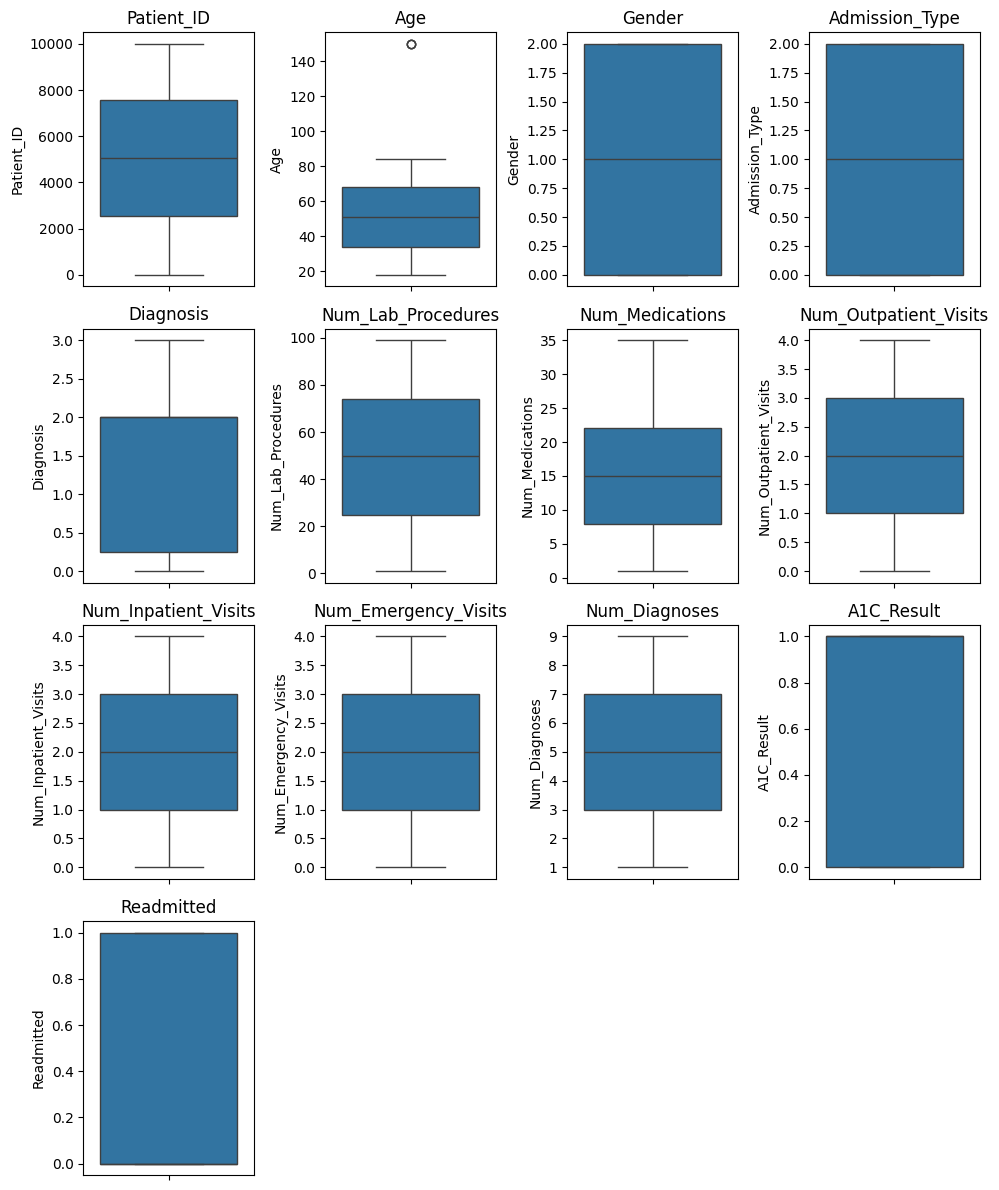

In [ ]:
columns = A1C_Not_Null.columns
plot_box_plots(A1C_Not_Null, columns)

In [ ]:
# Find outlier using IQR

In [ ]:
# Calculate quartiles and IQR
Q1 = A1C_Not_Null.quantile(0.25)
Q3 = A1C_Not_Null.quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
outliers = A1C_Not_Null[(A1C_Not_Null < lower_bound) | (A1C_Not_Null > upper_bound)]

# Count outliers
num_outliers = outliers.count()

print("Number of outliers:")
print(num_outliers)

Number of outliers:
Patient_ID               0
Age                      3
Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
A1C_Result               0
Readmitted               0
dtype: int64


In [ ]:
# find outlier using Z-score
df_age = A1C_Not_Null["Age"]

In [ ]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_zscore(df_age)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [150, 150, 150]


In [ ]:
# converts all the values above the upper threshold to the upper threshold value
# converts all the values below the lower threshold to the lower threshold value

def outlier(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3-Q1

    upper_threshold = Q3 + (1.5*IQR)
    lower_threshold = Q1 - (1.5*IQR)

    df["Age_New"] = df[col].clip(lower_threshold, upper_threshold)

In [ ]:
outlier(A1C_Not_Null,"Age")

In [ ]:
# Box plot after handling outlier

<Axes: ylabel='Age_New'>

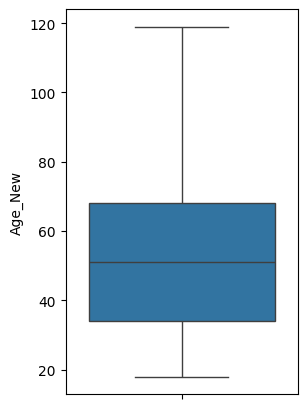

In [ ]:
plt.figure(figsize=(3, 5))
sns.boxplot(data=A1C_Not_Null, y=A1C_Not_Null["Age_New"])

In [ ]:
A1C_Not_Null.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_ID,5966.0,5027.117332,2889.804870,1.0,2529.75,5056.5,7548.5,9999.0
Age,5966.0,50.986591,19.488294,18.0,34.00,51.0,68.0,150.0
Gender,5966.0,0.988099,0.819518,0.0,0.00,1.0,2.0,2.0
Admission_Type,5966.0,1.009051,0.814528,0.0,0.00,1.0,2.0,2.0
Diagnosis,5966.0,1.500335,1.114674,0.0,0.25,2.0,2.0,3.0
Num_Lab_Procedures,5966.0,49.515085,28.357088,1.0,25.00,50.0,74.0,99.0
Num_Medications,5966.0,15.038217,8.438757,1.0,8.00,15.0,22.0,35.0
Num_Outpatient_Visits,5966.0,2.005867,1.422181,0.0,1.00,2.0,3.0,4.0
Num_Inpatient_Visits,5966.0,1.991452,1.407712,0.0,1.00,2.0,3.0,4.0
Num_Emergency_Visits,5966.0,1.999665,1.418002,0.0,1.00,2.0,3.0,4.0


In [ ]:
# droping the 'age' column

In [ ]:
A1C_Not_Null_1 = A1C_Not_Null.drop(columns=["Age"], axis=1)

In [ ]:
## Handling Skwness

In [ ]:
# Function for histogram
def plot_histograms(df, cols):

    plt.figure(figsize=(8, 15))

    for i, col in enumerate(cols):
        plt.subplot(7,2, i+1)
        sns.histplot(df[col],kde= True, bins=30, color="salmon")
        plt.title(col)
    plt.tight_layout()
    plt.show()

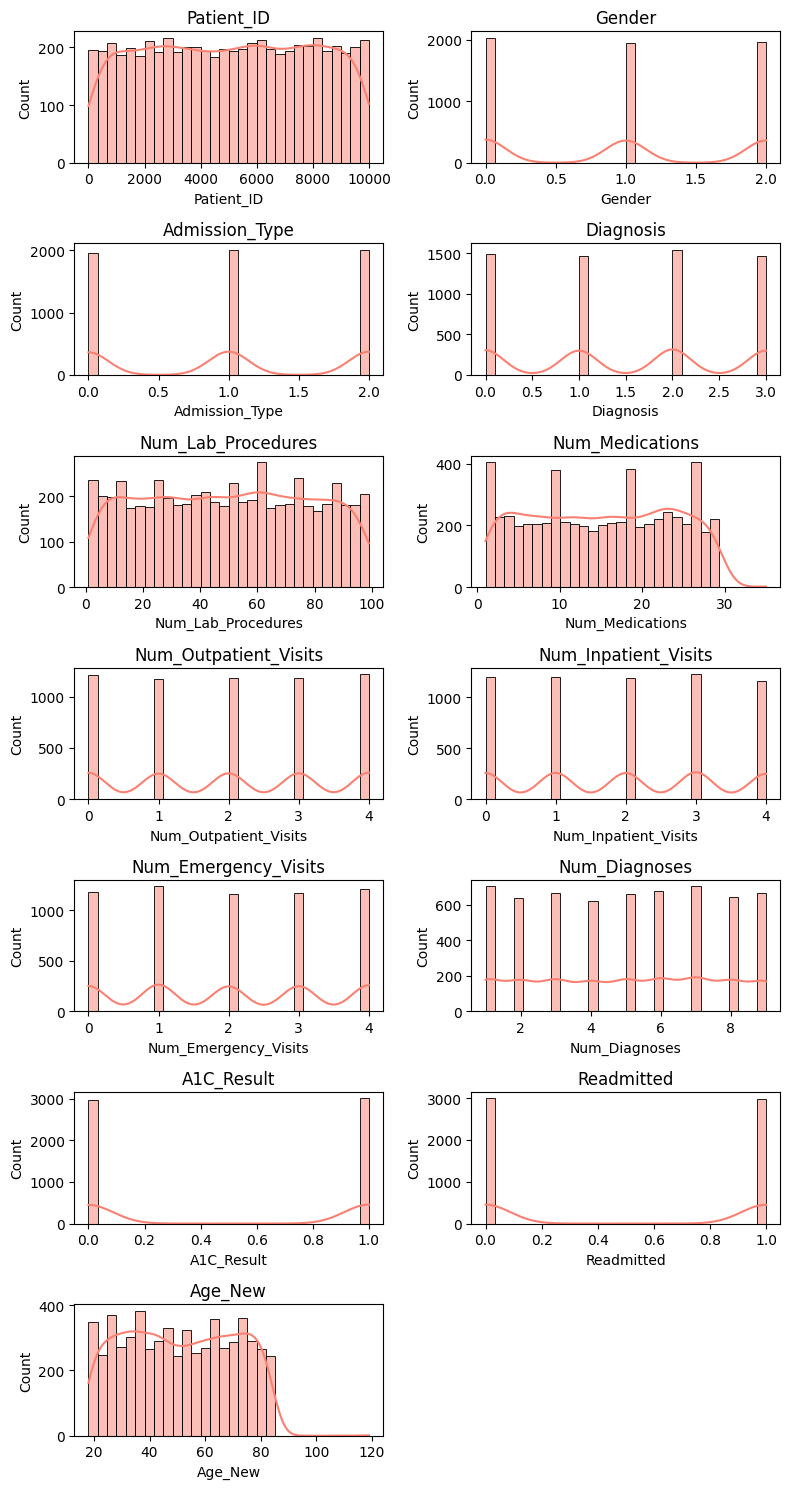

In [ ]:
columns = A1C_Not_Null_1.columns
plot_histograms(A1C_Not_Null_1, columns)

In [ ]:
A1C_Not_Null_1.skew()

Patient_ID              -0.011057
Gender                   0.021950
Admission_Type          -0.016592
Diagnosis               -0.009560
Num_Lab_Procedures       0.002873
Num_Medications         -0.011553
Num_Outpatient_Visits   -0.006841
Num_Inpatient_Visits     0.001091
Num_Emergency_Visits     0.012591
Num_Diagnoses           -0.017810
A1C_Result              -0.014084
Readmitted               0.006706
Age_New                  0.027593
dtype: float64

In [ ]:
# Skewness is a measure of lack of symmetry
# Skewness value range from -1 to 1:
# If the skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
# If the skewness is less than -0.5, the distribution is negatively skewed (left-skewed).
# If the skewness is greater than 0.5, the distribution is positively skewed (right-skewed).

In [ ]:
# Feature Selection

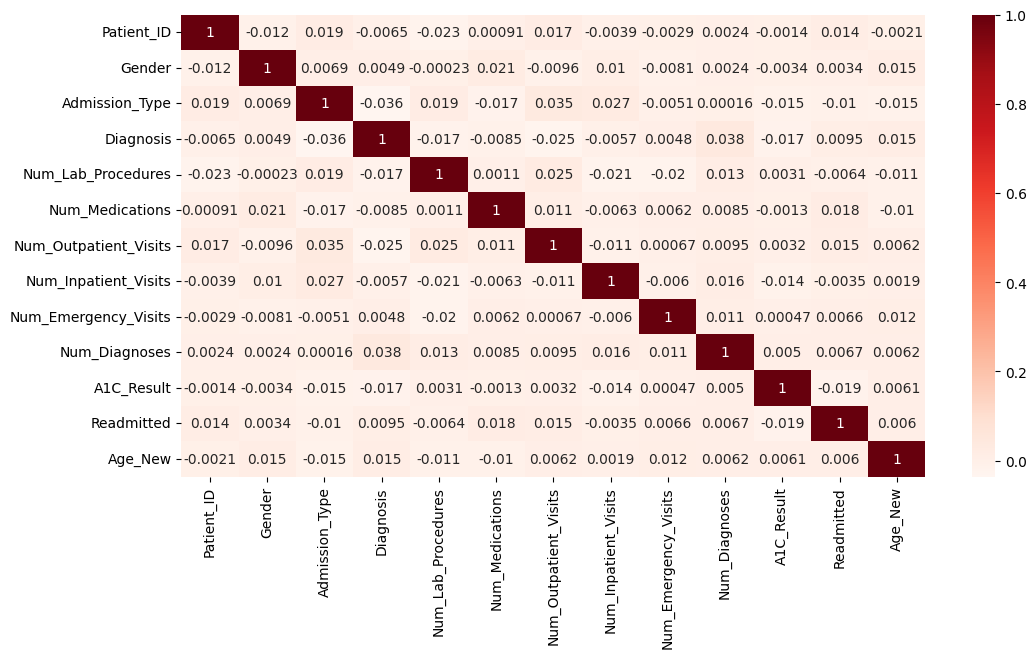

In [ ]:
# head map
plt.figure(figsize=(12,6))
sns.heatmap(A1C_Not_Null_1.corr(), annot=True, cmap="Reds")
plt.show()

In [ ]:
# Import necessary libraries
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):
    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return vif


In [ ]:
calc_vif(A1C_Not_Null_1)

,variables,VIF
0,Patient_ID,3.658190
1,Gender,2.360496
2,Admission_Type,2.431832
3,Diagnosis,2.662319
4,Num_Lab_Procedures,3.657480
5,Num_Medications,3.788275
6,Num_Outpatient_Visits,2.851224
7,Num_Inpatient_Visits,2.819715
8,Num_Emergency_Visits,2.814813
9,Num_Diagnoses,4.290026


In [ ]:
# Variance Inflation Factor
# -  VIF values below 5 indicate that multicollinearity is not a significant concern, and the predictor variables are likely not highly correlated with each other.
# - VIF values between 5 and 10 suggest moderate multicollinearity.
# - VIF values above 10 indicate potentially severe multicollinearity.

In [ ]:
# Droping the multicollinearity & unwanted columns

In [ ]:
A1C_Not_Null_2 = A1C_Not_Null_1.drop(columns=["Age_New","Patient_ID"], axis=1)

In [ ]:
calc_vif(A1C_Not_Null_2)

,variables,VIF
0,Gender,2.314633
1,Admission_Type,2.383119
2,Diagnosis,2.585111
3,Num_Lab_Procedures,3.527327
4,Num_Medications,3.639045
5,Num_Outpatient_Visits,2.771880
6,Num_Inpatient_Visits,2.741649
7,Num_Emergency_Visits,2.731495
8,Num_Diagnoses,4.092629
9,A1C_Result,1.916831


In [ ]:
A1C_Not_Null_2.isnull().sum()

Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
A1C_Result               0
Readmitted               0
dtype: int64

In [ ]:
A1C_Not_Null_2.head()

,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,0,2,0,35,14,2,1,4,5,1,0
2,0,0,0,22,2,4,3,3,5,0,1
3,0,2,2,22,10,2,2,3,9,1,1
4,1,1,1,3,6,4,3,1,2,0,0
5,1,1,0,46,23,0,2,4,3,1,0


In [ ]:
A1C_Not_Null_2.shape

(5966, 11)

In [ ]:
# saving with actual A1C values

A1C_Not_Null_2.to_csv("hospital_with_actual_A1C.csv", index= False)

In [ ]:
#   Model to Predict A1C Values

In [ ]:
!pip install xgboost


In [ ]:
# import
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_curve, confusion_matrix, classification_report

from imblearn.combine import SMOTETomek

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import pickle

In [ ]:
A1C_Not_Null_2.columns

Index(['Gender', 'Admission_Type', 'Diagnosis', 'Num_Lab_Procedures',
       'Num_Medications', 'Num_Outpatient_Visits', 'Num_Inpatient_Visits',
       'Num_Emergency_Visits', 'Num_Diagnoses', 'A1C_Result', 'Readmitted'],
      dtype='object')

In [ ]:
A1C_Not_Null_2["A1C_Result"].value_counts()

A1C_Result
1    3004
0    2962
Name: count, dtype: int64

In [ ]:
# Data Splitting

x = A1C_Not_Null_2.drop(columns=["A1C_Result"],axis=1) #independent variables.
y = A1C_Not_Null_2["A1C_Result"] #dependent variable

In [ ]:
x

,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,Readmitted
0,0,2,0,35,14,2,1,4,5,0
2,0,0,0,22,2,4,3,3,5,1
3,0,2,2,22,10,2,2,3,9,1
4,1,1,1,3,6,4,3,1,2,0
5,1,1,0,46,23,0,2,4,3,0
...,...,...,...,...,...,...,...,...,...,...
9994,0,2,1,4,13,4,3,0,4,1
9995,2,2,3,32,7,3,2,2,1,0
9996,1,2,1,28,9,3,3,0,2,0
9997,1,0,3,56,22,3,1,1,1,0


In [ ]:
y

0       1
2       0
3       1
4       0
5       1
       ..
9994    1
9995    1
9996    0
9997    1
9998    0
Name: A1C_Result, Length: 5966, dtype: int64

In [ ]:
# ### Handling Imbalanced feature &rarr; "SMOTE-Tomek"

# This method combines
# * SMOTE ability to generate synthetic data for minority class
# * Tomek has ability to remove the data that are identified as Tomek links from the majority class
# * Tomek links are pairs of instances from different classes that are very close to each other, but they are of different classes.

In [ ]:
# balancing using smotetomek
x_new, y_new = SMOTETomek().fit_resample(x,y)

In [ ]:
print(len(x_new))
print(len(y_new))

4466
4466


In [ ]:
x_new

,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,Readmitted
0,0,2,0,35,14,2,1,4,5,0
1,0,0,0,22,2,4,3,3,5,1
2,0,2,2,22,10,2,2,3,9,1
3,1,1,1,3,6,4,3,1,2,0
4,1,1,0,46,23,0,2,4,3,0
...,...,...,...,...,...,...,...,...,...,...
4461,0,0,1,40,19,1,1,0,8,0
4462,2,1,2,71,20,2,1,3,7,0
4463,1,1,2,31,28,1,3,3,6,1
4464,1,1,2,87,9,3,2,1,6,0


In [ ]:
y_new

0       1
1       0
2       1
3       0
4       1
       ..
4461    0
4462    0
4463    0
4464    0
4465    0
Name: A1C_Result, Length: 4466, dtype: int64

In [ ]:
# Logistic Regression

# splitting train & test
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size= 0.2, random_state=40)

model = LogisticRegression(solver='liblinear').fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

#checking the accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

metrics ={"Algorithm": "Logistic Regression",
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
print(metrics)

{'Algorithm': 'Logistic Regression', 'Accuracy_Train': 0.513437849944009, 'Accuracy_Test': 0.4899328859060403}


In [ ]:
# SVM Classification

# splitting train & test
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size= 0.2, random_state=40)

svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
model = svm.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

#checking the accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

metrics ={"Algorithm": "SVM",
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
print(metrics)

{'Algorithm': 'SVM', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.62751677852349}


In [ ]:
# Other classification algorithms

def accuracy_checking(x_data, y_data, algorithm):

    # splitting train & test
    x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.2, random_state=50)

    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    #checking the accuracy_score
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    metrics = {"Algorithm": algorithm.__name__,
               "Accuracy_Train": accuracy_train,
               "Accuracy_Test": accuracy_test}
    return metrics

In [ ]:
print(accuracy_checking(x_new,y_new,DecisionTreeClassifier))
print(accuracy_checking(x_new,y_new,RandomForestClassifier))
print(accuracy_checking(x_new,y_new,ExtraTreesClassifier))
print(accuracy_checking(x_new,y_new,AdaBoostClassifier))
print(accuracy_checking(x_new,y_new,GradientBoostingClassifier))
print(accuracy_checking(x_new,y_new,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.5123042505592841}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.5313199105145414}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.5346756152125279}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.5540313549832027, 'Accuracy_Test': 0.4955257270693512}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.6525755879059351, 'Accuracy_Test': 0.5111856823266219}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.9851623740201568, 'Accuracy_Test': 0.5906040268456376}


In [ ]:
## Cross Validation

In [ ]:
# StratifiedKFold Cross Validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Instantiate the classification model
A1C_Model = GradientBoostingClassifier()

# Instantiate Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Stratified K-Fold Cross-Validation and calculate accuracy for each fold
accuracy_scores = cross_val_score(model, x_new, y_new, scoring='accuracy', cv=skf)
mean_accuracy = np.mean(accuracy_scores)

# Print
print("Accuracy scores for each fold:", accuracy_scores)
print("Mean Accuracy:", mean_accuracy)


Accuracy scores for each fold: [0.61297539 0.60918253 0.6237402  0.61702128 0.62150056]
Mean Accuracy: 0.6168839920735725


In [ ]:
# Selected Model
x_train, x_test, y_train, y_test= train_test_split(x_new, y_new, test_size= 0.2, random_state= 42)

A1C_Model = GradientBoostingClassifier().fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [ ]:
### Performance Metrics

In [ ]:
# accuracy_score for train and test

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)

Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.9238521836506159
Accuracy_Test:  0.9317673378076062


In [ ]:
# confution matrics

print("Confution_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true = y_test, y_pred = y_pred_test))

Confution_matrix for Test
--------------------------
[[428  22]
 [ 39 405]]


In [ ]:
# classification report typically includes metrics such as precision, recall, F1-score, and support

print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))

Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

           0       0.92      0.95      0.93       450
           1       0.95      0.91      0.93       444

    accuracy                           0.93       894
   macro avg       0.93      0.93      0.93       894
weighted avg       0.93      0.93      0.93       894



In [ ]:
# Receiver Operating Characteristic (ROC) Curve

FP, TP, Threshold = roc_curve(y_true=y_test, y_score=y_pred_test)

print(FP)
print(TP)
print(Threshold)


[0.         0.04888889 1.        ]
[0.         0.91216216 1.        ]
[2 1 0]


In [ ]:
# Area Under the Curve (AUC)

auc_curve = auc(x=FP, y=TP)
print("auc_curve: ", auc_curve)

auc_curve:  0.9316366366366368


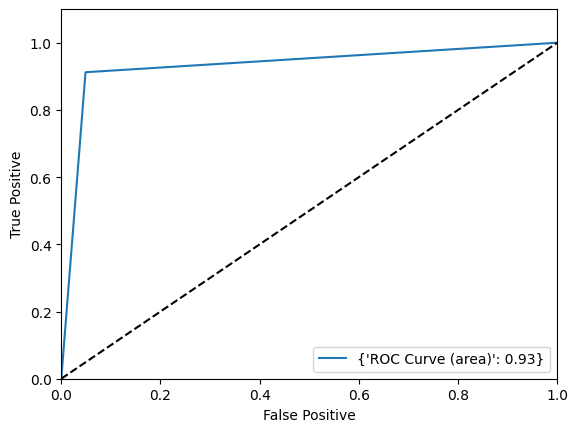

In [ ]:
# create a plot for ROC and AUC curve

roc_point= {"ROC Curve (area)":round(auc_curve, 2)}
plt.plot(FP,TP,label= roc_point)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()

In [ ]:
# Saving the Model unsing pickle
with open("A1C_Model.pkl","wb") as m:
    pickle.dump(A1C_Model, m)

In [ ]:
## Read the Dataframe

In [ ]:
df_1 = pd.read_csv("hospital_readmissions_only_int.csv")

In [ ]:
df_1.head()

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,1,69,0,2,0,35,14,2,1,4,5,1,0
1,2,32,2,1,2,66,3,1,2,4,6,2,0
2,3,78,0,0,0,22,2,4,3,3,5,0,1
3,4,38,0,2,2,22,10,2,2,3,9,1,1
4,5,41,1,1,1,3,6,4,3,1,2,0,0


In [ ]:
# Replacing the Unknown(2) values of A1C_Result

In [ ]:
# Drop rows where 'A1C_Result' has the value 'Unknown(2)'
A1C_Null = df_1[df_1['A1C_Result'] == 2]

In [ ]:
A1C_Null.head(25)

,Patient_ID,Age,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
1,2,32,2,1,2,66,3,1,2,4,6,2,0
6,7,39,2,1,0,50,7,4,0,3,3,2,1
8,9,19,1,1,2,4,6,0,3,1,6,2,0
9,10,47,2,0,3,15,16,1,3,3,8,2,1
14,15,38,1,0,3,73,15,2,4,0,4,2,0
17,18,39,1,1,0,34,28,0,3,0,1,2,0
18,19,66,2,2,3,26,16,4,3,4,3,2,1
19,20,76,2,0,1,85,18,2,1,0,2,2,1
23,24,79,2,2,1,52,17,4,2,2,2,2,1
24,25,79,1,0,3,54,2,2,1,0,1,2,0


In [ ]:
A1C_Null['A1C_Result'].unique()

array([2])

In [ ]:
A1C_Null.shape

In [ ]:
## Handling Outliers

In [ ]:
# Function for box plot
def plot_box_plots(df, cols):

    plt.figure(figsize=(10, 12))

    for i, col in enumerate(cols):
        plt.subplot(4, 4, i + 1)
        sns.boxplot(y=df[col])
        plt.title(col)
    plt.tight_layout()
    plt.show()

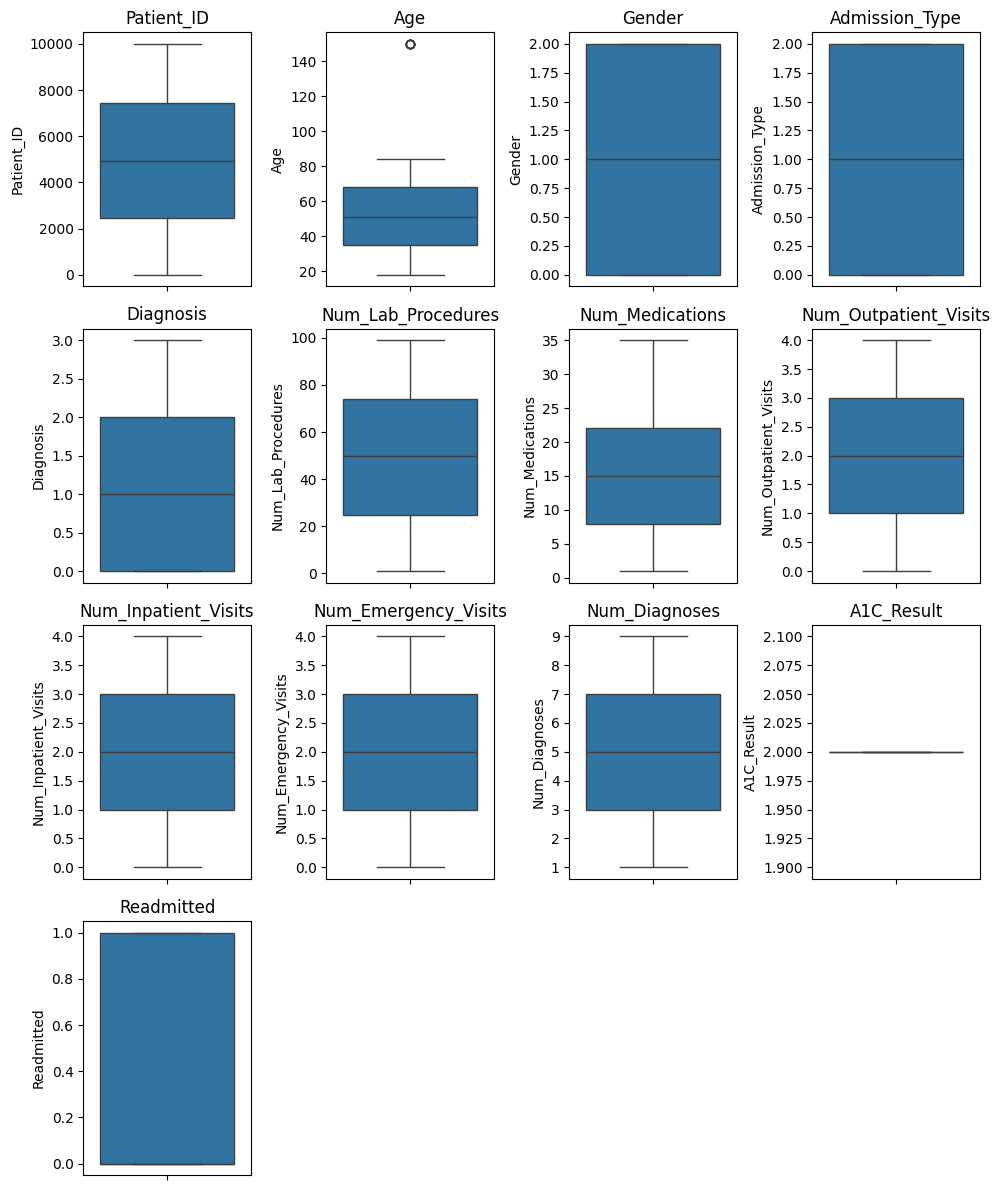

In [ ]:
columns = A1C_Null.columns
plot_box_plots(A1C_Null, columns)

In [ ]:
# Find outlier using IQR

In [ ]:
# Calculate quartiles and IQR
Q1 = A1C_Null.quantile(0.25)
Q3 = A1C_Null.quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
outliers = A1C_Null[(A1C_Null < lower_bound) | (A1C_Null > upper_bound)]

# Count outliers
num_outliers = outliers.count()

print("Number of outliers:")
print(num_outliers)

Number of outliers:
Patient_ID               0
Age                      7
Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
A1C_Result               0
Readmitted               0
dtype: int64


In [ ]:
# find outlier using Z-score

In [ ]:
df_age = A1C_Null["Age"]

In [ ]:
import numpy as np
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    # print(mean, std)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers# Driver code

sample_outliers = detect_outliers_zscore(df_age)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [150, 150, 150, 150, 150, 150, 150]


In [ ]:
# converts all the values above the upper threshold to the upper threshold value
# converts all the values below the lower threshold to the lower threshold value

def outlier(df,col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)

    IQR = Q3-Q1

    upper_threshold = Q3 + (1.5*IQR)
    lower_threshold = Q1 - (1.5*IQR)

    df["Age_New"] = df[col].clip(lower_threshold, upper_threshold)

In [ ]:
outlier(A1C_Null,"Age")

In [ ]:
# Box plot after handling outlier

<Axes: ylabel='Age_New'>

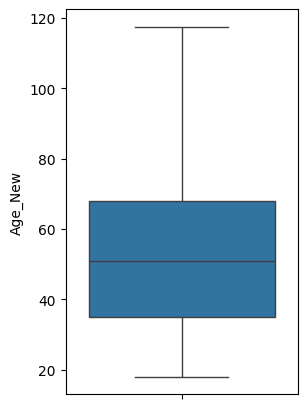

In [ ]:
plt.figure(figsize=(3, 5))
sns.boxplot(data=A1C_Null, y=A1C_Null["Age_New"])

In [ ]:
A1C_Null.describe().T

,count,mean,std,min,25%,50%,75%,max
Patient_ID,4034.0,4961.134854,2882.495262,2.0,2462.75,4915.5,7439.75,10000.0
Age,4034.0,51.305156,19.647421,18.0,35.00,51.0,68.00,150.0
Gender,4034.0,0.996777,0.818361,0.0,0.00,1.0,2.00,2.0
Admission_Type,4034.0,1.005702,0.809513,0.0,0.00,1.0,2.00,2.0
Diagnosis,4034.0,1.478433,1.112183,0.0,0.00,1.0,2.00,3.0
Num_Lab_Procedures,4034.0,50.084531,28.690609,1.0,25.00,50.0,74.00,99.0
Num_Medications,4034.0,15.005454,8.321191,1.0,8.00,15.0,22.00,35.0
Num_Outpatient_Visits,4034.0,1.998513,1.417015,0.0,1.00,2.0,3.00,4.0
Num_Inpatient_Visits,4034.0,2.004710,1.417096,0.0,1.00,2.0,3.00,4.0
Num_Emergency_Visits,4034.0,2.003966,1.408586,0.0,1.00,2.0,3.00,4.0


In [ ]:
# droping the 'age' column

In [ ]:
A1C_Null_1 = A1C_Null.drop(columns=["Age"], axis=1)

In [ ]:
## Handling Skwness

In [ ]:
# Function for histogram
def plot_histograms(df, cols):

    plt.figure(figsize=(8, 15))

    for i, col in enumerate(cols):
        plt.subplot(7,2, i+1)
        sns.histplot(df[col],kde= True, bins=30, color="salmon")
        plt.title(col)
    plt.tight_layout()
    plt.show()

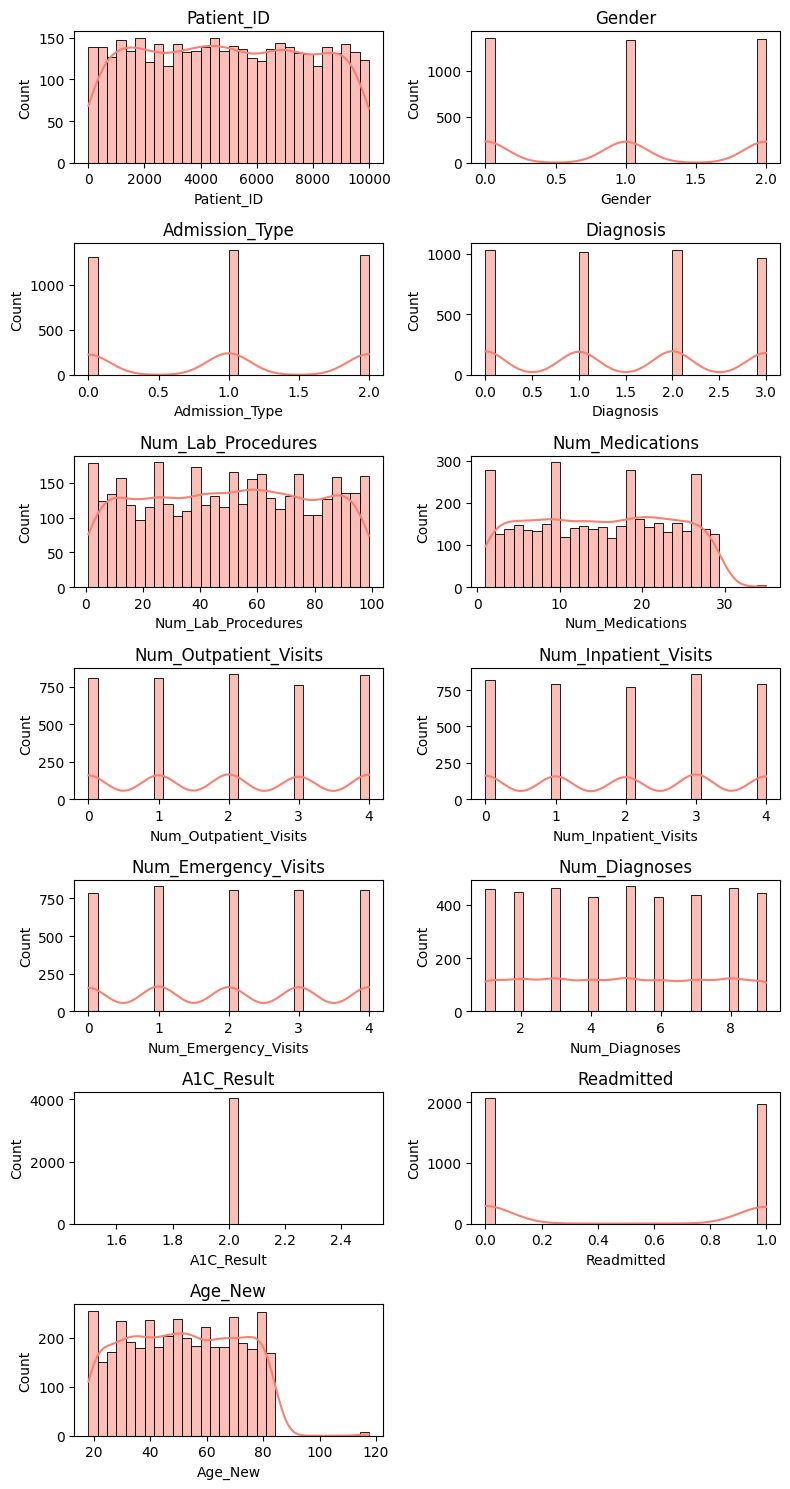

In [ ]:
columns = A1C_Null_1.columns
plot_histograms(A1C_Null_1, columns)

In [ ]:
A1C_Null_1.skew()

Patient_ID               0.016272
Gender                   0.005935
Admission_Type          -0.010385
Diagnosis                0.019124
Num_Lab_Procedures      -0.014560
Num_Medications          0.001672
Num_Outpatient_Visits    0.013613
Num_Inpatient_Visits    -0.020350
Num_Emergency_Visits     0.003088
Num_Diagnoses            0.009672
A1C_Result               0.000000
Readmitted               0.043656
Age_New                  0.043860
dtype: float64

In [ ]:
# Skewness is a measure of lack of symmetry
# Skewness value range from -1 to 1:
# If the skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
# If the skewness is less than -0.5, the distribution is negatively skewed (left-skewed).
# If the skewness is greater than 0.5, the distribution is positively skewed (right-skewed).

In [ ]:
# Feature Selection

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(A1C_Null_1)

,variables,VIF
0,Patient_ID,1.005066
1,Gender,1.002871
2,Admission_Type,1.001978
3,Diagnosis,1.001506
4,Num_Lab_Procedures,1.003748
5,Num_Medications,1.003417
6,Num_Outpatient_Visits,1.003178
7,Num_Inpatient_Visits,1.001320
8,Num_Emergency_Visits,1.001255
9,Num_Diagnoses,1.003373


In [ ]:
# Variance Inflation Factor
# -  VIF values below 5 indicate that multicollinearity is not a significant concern, and the predictor variables are likely not highly correlated with each other.
# - VIF values between 5 and 10 suggest moderate multicollinearity.
# - VIF values above 10 indicate potentially severe multicollinearity.

In [ ]:
# Droping the multicollinearity & unwanted columns

In [ ]:
A1C_Null_2 = A1C_Null_1.drop(columns=["Age_New","Patient_ID","A1C_Result"], axis=1)

In [ ]:
calc_vif(A1C_Null_2)

,variables,VIF
0,Gender,2.312268
1,Admission_Type,2.365420
2,Diagnosis,2.543636
3,Num_Lab_Procedures,3.442408
4,Num_Medications,3.628580
5,Num_Outpatient_Visits,2.770688
6,Num_Inpatient_Visits,2.736254
7,Num_Emergency_Visits,2.794969
8,Num_Diagnoses,3.887786
9,Readmitted,1.875903


In [ ]:
A1C_Null_2.isnull().sum()

Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
Readmitted               0
dtype: int64

In [ ]:
A1C_Null_2.head()

,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,Readmitted
1,2,1,2,66,3,1,2,4,6,0
6,2,1,0,50,7,4,0,3,3,1
8,1,1,2,4,6,0,3,1,6,0
9,2,0,3,15,16,1,3,3,8,1
14,1,0,3,73,15,2,4,0,4,0


In [ ]:
#   Predict Hospital Re-admissions Model

In [ ]:
import pickle

In [ ]:
# Loading the MODEL
with open("A1C_Model.pkl","rb") as m1:
    A1C_Model = pickle.load(m1)

new_A1C = A1C_Model.predict(A1C_Null_2)

A1C_Null_2['A1C_Result'] = new_A1C

# Using pop replace 'Readmitted' placing to the last position
A1C_Result_column  = A1C_Null_2.pop('Readmitted')

A1C_Null_2['Readmitted'] = A1C_Result_column

In [ ]:
A1C_Null_2.tail()

,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
9984,0,2,1,87,22,3,3,3,6,0,0
9985,0,1,0,5,5,0,0,0,8,1,0
9988,1,1,3,87,15,0,2,0,6,0,0
9990,0,2,2,98,13,2,0,4,1,1,0
9999,1,0,2,8,1,1,1,2,9,0,1


In [ ]:
A1C_Null_2.shape

(4034, 11)

In [ ]:
A1C_Null_2["A1C_Result"].unique()

array([0, 1])

In [ ]:
# saving with actual A1C values

A1C_Null_2.to_csv("hospital_with_predicted_A1C.csv", index= False)

In [ ]:
## Read the Dataframe

In [ ]:
df1 = pd.read_csv("hospital_with_actual_A1C.csv")
df2 = pd.read_csv("hospital_with_predicted_A1C.csv")

In [ ]:
# Concatenate the two DataFrames along the rows (axis=0)
final_df = pd.concat([df1, df2], axis=0)

# Reset the index of the concatenated DataFrame
final_df.reset_index(drop=True, inplace=True)

# Display the concatenated DataFrame
final_df.head()

,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,0,2,0,35,14,2,1,4,5,1,0
1,0,0,0,22,2,4,3,3,5,0,1
2,0,2,2,22,10,2,2,3,9,1,1
3,1,1,1,3,6,4,3,1,2,0,0
4,1,1,0,46,23,0,2,4,3,1,0


In [ ]:
final_df['A1C_Result'].value_counts()

A1C_Result
1    5144
0    4856
Name: count, dtype: int64

In [ ]:
#shape
final_df.shape

(10000, 11)

In [ ]:
# info
final_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Gender                 10000 non-null  int64
 1   Admission_Type         10000 non-null  int64
 2   Diagnosis              10000 non-null  int64
 3   Num_Lab_Procedures     10000 non-null  int64
 4   Num_Medications        10000 non-null  int64
 5   Num_Outpatient_Visits  10000 non-null  int64
 6   Num_Inpatient_Visits   10000 non-null  int64
 7   Num_Emergency_Visits   10000 non-null  int64
 8   Num_Diagnoses          10000 non-null  int64
 9   A1C_Result             10000 non-null  int64
 10  Readmitted             10000 non-null  int64
dtypes: int64(11)
memory usage: 859.5 KB


In [ ]:
#null
final_df.isnull().sum()

Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
A1C_Result               0
Readmitted               0
dtype: int64

In [ ]:
#duplicates
final_df.duplicated().sum()

0

In [ ]:
#unique
final_df.nunique()

Gender                    3
Admission_Type            3
Diagnosis                 4
Num_Lab_Procedures       99
Num_Medications          30
Num_Outpatient_Visits     5
Num_Inpatient_Visits      5
Num_Emergency_Visits      5
Num_Diagnoses             9
A1C_Result                2
Readmitted                2
dtype: int64

In [ ]:
for column in final_df.columns:
    unique_values = final_df[column].unique()
    print(f"'{column}':\n {unique_values}\n")

'Gender':
 [0 1 2]

'Admission_Type':
 [2 0 1]

'Diagnosis':
 [0 2 1 3]

'Num_Lab_Procedures':
 [35 22  3 46  8 44 39 76 29 62 84 87 18 63 88 52 32 58 27 78 54 79 85 43
 14 66 81 41 38 42 50 31 40 73 30 28 47 89 56 97 33 91 68 64 92 12 67 10
 86 61 11 16 80  6 17 95 49 82  2  5 19  4 83 26 71 51 45 70 48 60 36 53
 94 74 25 57 98 55  7 59 20 34 23  9 72 90 21 37 77  1 15 96 69 93 13 24
 75 99 65]

'Num_Medications':
 [14  2 10  6 23 16 27 24 12 22  3 15  4 35  9 13 20  8 21 18 19 26  7 17
  5  1 11 28 29 25]

'Num_Outpatient_Visits':
 [2 4 0 1 3]

'Num_Inpatient_Visits':
 [1 3 2 4 0]

'Num_Emergency_Visits':
 [4 3 1 2 0]

'Num_Diagnoses':
 [5 9 2 3 6 1 7 8 4]

'A1C_Result':
 [1 0]

'Readmitted':
 [0 1]



In [ ]:
# Save the Dataframe
final_df.to_csv("hospital_readmissions_final.csv", index= False)

In [ ]:
## Handling Outliers

In [ ]:
# Calculate quartiles and IQR
Q1 = final_df.quantile(0.25)
Q3 = final_df.quantile(0.75)
IQR = Q3 - Q1

# Calculate upper and lower bounds for outliers
upper_bound = Q3 + 1.5 * IQR
lower_bound = Q1 - 1.5 * IQR

# Identify outliers
outliers = final_df[(final_df < lower_bound) | (final_df > upper_bound)]

# Count outliers
num_outliers = outliers.count()

print("Number of outliers:")
print(num_outliers)

Number of outliers:
Gender                   0
Admission_Type           0
Diagnosis                0
Num_Lab_Procedures       0
Num_Medications          0
Num_Outpatient_Visits    0
Num_Inpatient_Visits     0
Num_Emergency_Visits     0
Num_Diagnoses            0
A1C_Result               0
Readmitted               0
dtype: int64


In [ ]:
## Handling Skwness

In [ ]:
# Function for histogram
def plot_histograms(df, cols):

    plt.figure(figsize=(8, 15))

    for i, col in enumerate(cols):
        plt.subplot(7,2, i+1)
        sns.histplot(df[col],kde= True, bins=30, color="salmon")
        plt.title(col)
    plt.tight_layout()
    plt.show()

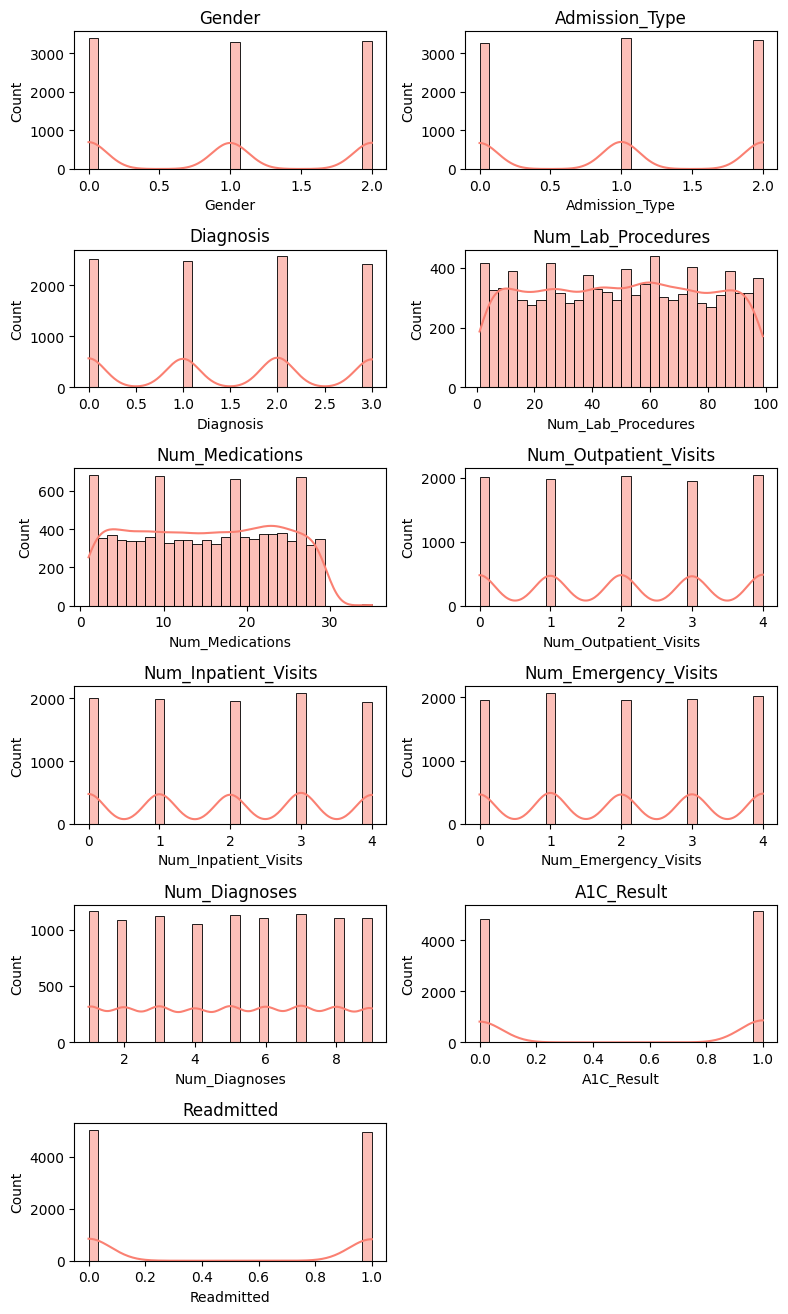

In [ ]:
columns = final_df.columns
plot_histograms(final_df, columns)

In [ ]:
final_df.skew()

Gender                   0.015482
Admission_Type          -0.014077
Diagnosis                0.002027
Num_Lab_Procedures      -0.003968
Num_Medications         -0.006273
Num_Outpatient_Visits    0.001383
Num_Inpatient_Visits    -0.007569
Num_Emergency_Visits     0.008773
Num_Diagnoses           -0.006739
A1C_Result              -0.057633
Readmitted               0.021605
dtype: float64

In [ ]:
#     Skewness is a measure of lack of symmetry
#     Skewness value range from -1 to 1:

# - If the skewness is between -0.5 and 0.5, the distribution is approximately symmetric.
# - If the skewness is less than -0.5, the distribution is negatively skewed (left-skewed).
# - If the skewness is greater than 0.5, the distribution is positively skewed (right-skewed)

In [ ]:
# Checking for multicollinearity

In [ ]:
# Import library for VIF
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calc_vif(X):

    # Calculating VIF
    vif = pd.DataFrame()
    vif["variables"] = X.columns
    vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

    return(vif)

In [ ]:
calc_vif(final_df)

,variables,VIF
0,Gender,2.309700
1,Admission_Type,2.373879
2,Diagnosis,2.563073
3,Num_Lab_Procedures,3.517391
4,Num_Medications,3.667067
5,Num_Outpatient_Visits,2.777742
6,Num_Inpatient_Visits,2.733918
7,Num_Emergency_Visits,2.753131
8,Num_Diagnoses,4.085709
9,A1C_Result,1.969698


In [ ]:
# Variance Inflation Factor

# - VIF values below 5 indicate that multicollinearity is not a significant concern, and the predictor variables are likely not highly correlated with each other.
# - VIF values between 5 and 10 suggest moderate multicollinearity.
# - VIF values above 10 indicate potentially severe multicollinearity.



In [ ]:
#  Model to Readmission

In [ ]:
# import
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, auc, roc_curve, confusion_matrix, classification_report

from imblearn.combine import SMOTETomek

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

import pickle

In [ ]:
final_df.columns

Index(['Gender', 'Admission_Type', 'Diagnosis', 'Num_Lab_Procedures',
       'Num_Medications', 'Num_Outpatient_Visits', 'Num_Inpatient_Visits',
       'Num_Emergency_Visits', 'Num_Diagnoses', 'A1C_Result', 'Readmitted'],
      dtype='object')

In [ ]:
final_df["Readmitted"].value_counts()

Readmitted
0    5054
1    4946
Name: count, dtype: int64

In [ ]:
# Data Splitting

x_new = final_df.drop(columns=["Readmitted"],axis=1) #independent variables.
y_new = final_df["Readmitted"] #dependent variable

In [ ]:
# Logistic Regression

# splitting train & test
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size= 0.2, random_state=40)

model = LogisticRegression(solver='liblinear').fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

#checking the accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

metrics ={"Algorithm": "Logistic Regression",
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
print(metrics)

{'Algorithm': 'Logistic Regression', 'Accuracy_Train': 0.539375, 'Accuracy_Test': 0.5245}


In [ ]:
# SVM Classification

# splitting train & test
x_train, x_test, y_train, y_test = train_test_split(x_new, y_new, test_size= 0.2, random_state=40)

svm = SVC(kernel="rbf", gamma=0.5, C=1.0)
model = svm.fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

#checking the accuracy_score
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

metrics ={"Algorithm": "SVM",
           "Accuracy_Train": accuracy_train,
           "Accuracy_Test": accuracy_test}
print(metrics)

{'Algorithm': 'SVM', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.4955}


In [ ]:
# Other classification algorithms

def accuracy_checking(x_data, y_data, algorithm):

    # splitting train & test
    x_train, x_test, y_train, y_test= train_test_split(x_data, y_data, test_size= 0.2, random_state=40)

    model = algorithm().fit(x_train, y_train)

    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)

    #checking the accuracy_score
    accuracy_train = accuracy_score(y_train, y_pred_train)
    accuracy_test = accuracy_score(y_test, y_pred_test)

    metrics = {"Algorithm": algorithm.__name__,
               "Accuracy_Train": accuracy_train,
               "Accuracy_Test": accuracy_test}
    return metrics

In [ ]:
print(accuracy_checking(x_new,y_new,DecisionTreeClassifier))
print(accuracy_checking(x_new,y_new,RandomForestClassifier))
print(accuracy_checking(x_new,y_new,ExtraTreesClassifier))
print(accuracy_checking(x_new,y_new,AdaBoostClassifier))
print(accuracy_checking(x_new,y_new,GradientBoostingClassifier))
print(accuracy_checking(x_new,y_new,XGBClassifier))

{'Algorithm': 'DecisionTreeClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.5045}
{'Algorithm': 'RandomForestClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.5235}
{'Algorithm': 'ExtraTreesClassifier', 'Accuracy_Train': 1.0, 'Accuracy_Test': 0.516}
{'Algorithm': 'AdaBoostClassifier', 'Accuracy_Train': 0.54525, 'Accuracy_Test': 0.509}
{'Algorithm': 'GradientBoostingClassifier', 'Accuracy_Train': 0.603375, 'Accuracy_Test': 0.525}
{'Algorithm': 'XGBClassifier', 'Accuracy_Train': 0.91325, 'Accuracy_Test': 0.5075}


In [ ]:
## Cross Validation

In [ ]:
# StratifiedKFold Cross Validation
from sklearn.model_selection import cross_val_score, StratifiedKFold

# Instantiate the classification model
A1C_Model = GradientBoostingClassifier()

# Instantiate Stratified K-Fold cross-validator
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform Stratified K-Fold Cross-Validation and calculate accuracy for each fold
accuracy_scores = cross_val_score(model, x_new, y_new, scoring='accuracy', cv=skf)
mean_accuracy = np.mean(accuracy_scores)

# Print
print("Accuracy scores for each fold:", accuracy_scores)
print("Mean Accuracy:", mean_accuracy)


Accuracy scores for each fold: [0.503  0.5035 0.5005 0.5095 0.514 ]
Mean Accuracy: 0.5061


In [ ]:
# Selected Model
x_train, x_test, y_train, y_test= train_test_split(x_new, y_new, test_size= 0.2, random_state= 50)

Readmission_Model = GradientBoostingClassifier().fit(x_train, y_train)

y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [ ]:
### Performance Metrics

In [ ]:
# accuracy_score for train and test

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)

print("Accuracy score for Train and Test")
print("----------------------------------")
print("Accuracy_Train: ",accuracy_train)
print("Accuracy_Test: ",accuracy_test)

Accuracy score for Train and Test
----------------------------------
Accuracy_Train:  0.896875
Accuracy_Test:  0.908


In [ ]:
# confution matrics

print("Confution_matrix for Test")
print("--------------------------")
print(confusion_matrix(y_true = y_test, y_pred = y_pred_test))

Confution_matrix for Test
--------------------------
[[971  35]
 [149 845]]


In [ ]:
# classification report typically includes metrics such as precision, recall, F1-score, and support

print("Classification_report for Test")
print("-------------------------------")
print(classification_report(y_true= y_test, y_pred= y_pred_test))

Classification_report for Test
-------------------------------
              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1006
           1       0.96      0.85      0.90       994

    accuracy                           0.91      2000
   macro avg       0.91      0.91      0.91      2000
weighted avg       0.91      0.91      0.91      2000



In [ ]:
# Receiver Operating Characteristic (ROC) Curve

FP, TP, Threshold = roc_curve(y_true=y_test, y_score=y_pred_test)

print(FP)
print(TP)
print(Threshold)


[0.         0.03479125 1.        ]
[0.        0.8501006 1.       ]
[2 1 0]


In [ ]:
# Area Under the Curve (AUC)

auc_curve = auc(x=FP, y=TP)
print("auc_curve: ", auc_curve)

auc_curve:  0.9076546755683204


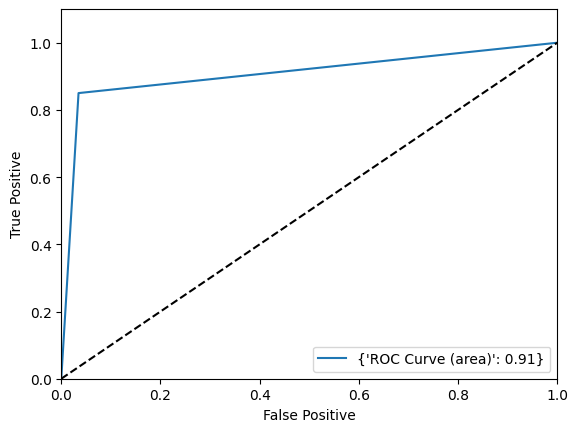

In [ ]:
# create a plot for ROC and AUC curve

roc_point= {"ROC Curve (area)":round(auc_curve, 2)}
plt.plot(FP,TP,label= roc_point)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.1])
plt.xlabel("False Positive")
plt.ylabel("True Positive")
plt.plot([0,1],[0,1],"k--")
plt.legend(loc= "lower right")
plt.show()

In [ ]:
# Saving the Model unsing pickle
with open("Readmission_Model.pkl","wb") as m:
    pickle.dump(Readmission_Model, m)

In [ ]:
final_df.head()

,Gender,Admission_Type,Diagnosis,Num_Lab_Procedures,Num_Medications,Num_Outpatient_Visits,Num_Inpatient_Visits,Num_Emergency_Visits,Num_Diagnoses,A1C_Result,Readmitted
0,0,2,0,35,14,2,1,4,5,1,0
1,0,0,0,22,2,4,3,3,5,0,1
2,0,2,2,22,10,2,2,3,9,1,1
3,1,1,1,3,6,4,3,1,2,0,0
4,1,1,0,46,23,0,2,4,3,1,0


In [ ]:
# END

In [ ]:
# testing
user_data = np.array([[0,2,1,75,29,4,0,3,5,1]])
prediction = Readmission_Model.predict(user_data)
prediction[0]

0

In [ ]:
x_new.columns

Index(['Gender', 'Admission_Type', 'Diagnosis', 'Num_Lab_Procedures',
       'Num_Medications', 'Num_Outpatient_Visits', 'Num_Inpatient_Visits',
       'Num_Emergency_Visits', 'Num_Diagnoses', 'A1C_Result'],
      dtype='object')

In [ ]:
# Min & Max of each Column
min_values = x_new.min()
max_values = x_new.max()

# Concatenate min_values and max_values along the columns axis
min_max_df = pd.concat([min_values, max_values], axis=1)
min_max_df.columns = ['Minimum', 'Maximum']

print("Minimum and Maximum values of all columns:")
print(" ")
print(min_max_df)

Minimum and Maximum values of all columns:
 
                       Minimum  Maximum
Gender                       0        2
Admission_Type               0        2
Diagnosis                    0        3
Num_Lab_Procedures           1       99
Num_Medications              1       35
Num_Outpatient_Visits        0        4
Num_Inpatient_Visits         0        4
Num_Emergency_Visits         0        4
Num_Diagnoses                1        9
A1C_Result                   0        1


In [ ]:
!pip install streamlit-option-menu


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 823.4/823.4 kB 19.6 MB/s eta 0:00:00


In [ ]:
!pip install streamlit

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 31.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.9/82.9 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 3.2 MB/s eta 0:00:00


In [ ]:

# streamlit part

# import
import pandas as pd
import numpy as np
import streamlit as st
from streamlit_option_menu import option_menu

import pickle
from PIL import Image

import warnings
warnings.filterwarnings("ignore")



def predict_readmission(Gender, Admission_Type, Diagnosis, Num_Lab_Procedures,
       Num_Medications, Num_Outpatient_Visits, Num_Inpatient_Visits,
       Num_Emergency_Visits, Num_Diagnoses, A1C_Result):

    with open("Readmission_Model.pkl","rb") as m:
        model = pickle.load(m)

    data = np.array([[Gender, Admission_Type, Diagnosis, Num_Lab_Procedures,
       Num_Medications, Num_Outpatient_Visits, Num_Inpatient_Visits,
       Num_Emergency_Visits, Num_Diagnoses, A1C_Result]])
    prediction = model.predict(data)
    out = prediction[0]
    return out



st.markdown("<h1 style='text-align: center; color: #fa6607;'>Predicting Hospital Readmissions</h1>", unsafe_allow_html=True)
st.write("")

select = option_menu(None,["Home", "Readmission"],
                    icons =["hospital-fill","ticket-detailed"], orientation="horizontal",
                    styles={"container": {"padding": "0!important", "background-color": "#fafafa"},
                            "icon": {"color": "#fdfcfb", "font-size": "20px"},
                            "nav-link": {"font-size": "20px", "text-align": "center", "margin":"0px", "--hover-color": "#eee"},
                            "nav-link-selected": {"background-color": "#fa6607"}})

if select == "Home":
    st.title("Welcome to the Hospital Readmissions Prediction Project!")

    st.write('''
**Objective:**
The primary goal of this project is to develop a predictive model that accurately determines whether a patient will require readmission within 30 days after their initial discharge. By leveraging advanced machine learning techniques, this project aims to enhance patient care and optimize healthcare resources.

**Key Features:**
- **Predictive Modeling:** This machine learning model analyzes patient data to predict the likelihood of hospital readmission within 30 days. This predictive capability enables proactive intervention and personalized care planning for at-risk patients.

- **Data-Driven Insights:** By processing comprehensive healthcare records, this model extracts valuable insights and identifies key factors contributing to readmission risk. These insights empower healthcare providers to make informed decisions and implement targeted interventions.

**How It Works:**
1. **Data Input:** This model accepts input data comprising patient demographics, medical history, previous hospitalizations, diagnoses, and medications.

2. **Predictive Analysis:** Leveraging state-of-the-art machine learning algorithms, the model processes the input data to generate predictions on whether readmission is required or not.

3. **Actionable Recommendations:** Based on the model's predictions, healthcare providers can proactively engage with high-risk patients, implement preventive measures, and optimize post-discharge care plans to minimize readmission rates.

**Technological Stack:**
This predictive model is developed using Python, a versatile programming language for data science and machine learning. It leverages industry-standard libraries such as scikit-learn for modeling and pandas for data manipulation to ensure robust performance and reliability.

**Stay Informed:**
Follow along as this project explores the intricacies of hospital readmissions prediction and strives to make a positive impact on patient outcomes and healthcare delivery.

''')

elif select == "Readmission":

    st.write("")
    st.header("Fill all the details below to know the prediction")
    st.write("")

    col1,col2,col3 = st.columns([5,1,5])
    with col1:
        selected_gender = st.selectbox('Select a Gender:', ["Female", "Male", "Other"])
        if selected_gender == "Female":
            Gender = 0
        elif selected_gender == "Male":
            Gender = 1
        else:
            Gender = 2


        Selected_Admission_Type  = st.selectbox('Select a Admission Type:', ['Emergency','Urgent', 'Elective'])
        if Selected_Admission_Type  == "Emergency":
            Admission_Type = 1
        elif Selected_Admission_Type == "Urgent":
            Admission_Type = 2
        else:
            Admission_Type = 0

        Selected_Diagnosis  = st.selectbox('Select a Diagnosis:', ['Heart Disease', 'Diabetes', 'Injury', 'Infection'])
        if Selected_Admission_Type  == "Heart Disease":
            Diagnosis = 1
        elif Selected_Admission_Type == "Diabetes":
            Diagnosis = 0
        elif Selected_Admission_Type == "Injury":
            Diagnosis = 3
        else:
            Diagnosis = 2

        Num_Lab_Procedures  = st.selectbox('Select a Number of Lab Procedures:', range(1,100))

        Num_Medications  = st.selectbox('Select a Number of Medications:', range(1,36))

    with col3:
        Num_Outpatient_Visits  = st.selectbox('Select a Number of Outpatient Visits:', range(0,5))

        Num_Inpatient_Visits  = st.selectbox('Select a Number of Inpatient Visits:', range(0,5))

        Num_Emergency_Visits  = st.selectbox('Select a Number of Emergency Visits:', range(0,5))

        Num_Diagnoses  = st.selectbox('Select a Number of Diagnoses:', range(1,10))

        A1C = st.selectbox('Select a Number of A1C Result:', ['Normal','Abnormal'])
        if A1C  == "Normal":
            A1C_Result = 1
        else:
            A1C_Result = 0

    st.write("")
    st.write("")

    col1,col2,col3 = st.columns([3,4,3])
    with col2:
        button = st.button(":red[PREDICT THE READMISSION]",use_container_width= True)

        if button:
            admission = predict_readmission(Gender, Admission_Type, Diagnosis, Num_Lab_Procedures,
       Num_Medications, Num_Outpatient_Visits, Num_Inpatient_Visits,
       Num_Emergency_Visits, Num_Diagnoses, A1C_Result)
            if admission == 1:
                st.write("## :red[Readmission is Required]")
            else:
                st.write("## :green[Readmission is Not Required]")



2024-09-12 12:24:25.028 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-12 12:24:25.046 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-12 12:24:25.051 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-12 12:24:25.189 
  command:

    streamlit run /usr/local/lib/python3.10/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2024-09-12 12:24:25.192 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-12 12:24:25.195 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-09-12 12:24:25.197 Thread 'MainThread'

In [ ]:
!ngrok authtoken V6DA5T2H7EFHVSGWYLNQG2C4NDZHYEYK


Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml
